In [1]:
import pandas as pd
import matplotlib
import sys
# print(sys.argv[1])
df = pd.read_csv('threads_find_best.csv') 
# print(df.groupby(['total_log_yes (in us)','num_log_yes']).mean().reset_index())

COMMIT_ALG            ONE_PC    TWO_PC
NUM_SERVER_THREADS                    
25                  6438.686  5765.580
26                  6766.678  6002.890
27                  7014.424  5966.302
28                  7312.846  6137.524
29                  7417.136  6289.412
30                  7508.296  6671.822
31                  7015.232  5700.198
32                  6042.232  4489.990


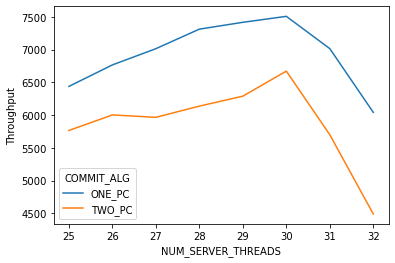

In [2]:
grouped = df.groupby(['COMMIT_ALG', 'NUM_SERVER_THREADS'])
newdf = grouped['Throughput'].mean().reset_index()
newdf = newdf.pivot(index='NUM_SERVER_THREADS', columns='COMMIT_ALG', values='Throughput')
print(newdf)
plot = newdf.plot()
plot.set_ylabel("Throughput")
fig = plot.get_figure()
fig.savefig("threads_find_best.png")


COMMIT_ALG            ONE_PC    TWO_PC
NUM_SERVER_THREADS                    
25                  0.003066  0.003448
26                  0.002983  0.003452
27                  0.002995  0.003601
28                  0.002944  0.003647
29                  0.003004  0.003642
30                  0.003089  0.003581
31                  0.003421  0.004302
32                  0.004247  0.005524


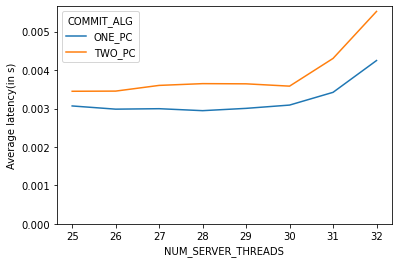

In [6]:
df2 = grouped['average_latency'].mean().reset_index()
df2 = df2.pivot(index='NUM_SERVER_THREADS', columns='COMMIT_ALG', values='average_latency')
print(df2)
plot = df2.plot()
plot.set_ylabel("Average latency(in s)")
plot.set_ylim(bottom=0)
fig = plot.get_figure()
fig.savefig("threads_latency.png")

In [9]:
latency = grouped['execute_phase (in us)', 'prepare_phase_1 (in us)', 'prepare_phase_2 (in us)','total_log_yes (in us)', 'commit_phase (in us)', 'abort (in us)'].mean().reset_index()
result = latency[latency['NUM_SERVER_THREADS'] == 28]

<ipython-input-9-42b7ab84fbbf>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  latency = grouped['execute_phase (in us)', 'prepare_phase_1 (in us)', 'prepare_phase_2 (in us)','total_log_yes (in us)', 'commit_phase (in us)', 'abort (in us)'].mean().reset_index()


   COMMIT_ALG  NUM_SERVER_THREADS  execute_phase (in us)  \
3      ONE_PC                  28               346.0208   
11     TWO_PC                  28               388.8812   

    prepare_phase_1 (in us)  prepare_phase_2 (in us)  total_log_yes (in us)  \
3                  2595.872                 0.150201               2144.502   
11                 2563.156                 0.232120               2103.720   

    commit_phase (in us)  abort (in us)  
3               0.927171       0.894162  
11            691.430200       2.955611  


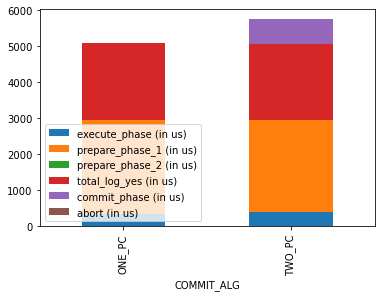

In [10]:
print(result)
result = result.drop(['NUM_SERVER_THREADS'], axis=1)
latency_plot = result.plot.bar(stacked='True', x='COMMIT_ALG')
fig = latency_plot.get_figure()
fig.savefig("latency_zipf09_std.png")